In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 24})
import os
import pints
import pandas as pd
from experimental_data_processing import processingExperimentalData

In [2]:
 # reading in experimental data
input_data_file = os.path.join('Data', 'processed')
input_data_file = os.path.join(input_data_file, '220415')
input_data_file = os.path.join(input_data_file, 'ph9 2m nacl 25oC')
input_data_file = os.path.join(input_data_file, 'ac')
input_data_file = os.path.join(input_data_file, '9 150_1_cv_current')
#input_data_file = os.path.join(input_data_file, '9_1b_cv_current')
# file for outut
output_data_file = os.path.join('Data', 'processed')
output_data_file = os.path.join(output_data_file, '220415')
output_data_file = os.path.join(output_data_file, 'ph9 2m nacl 25oC')
output_data_file = os.path.join(output_data_file, 'ac')
output_data_file = os.path.join(output_data_file, '9 150_1_cv_current_reduced.txt')
#output_data_file = os.path.join(output_data_file, '9_1b_cv_current_reduced.txt')

# frequency of experimental data
freq = 8.941

In [3]:
# creating instance of dataprocessing class
data_processing = processingExperimentalData(input_data_file, output_data_file)

# caculating number of periods in raw experimental data
x = data_processing.how_many_periods(data_processing.data, freq)
print('periods in untouched data: ', x)

# suggesting a number of rows to drop to make the sampled data closer to an intetger number of periods
rows_to_drop = data_processing.suggested_cut_for_periods(data_processing.data, freq)
print('\n\n suggested_cut_for_periods: ',rows_to_drop)

columnsnames:  Index(['time', 'current'], dtype='object')
periods in untouched data:  480.01609287
rows dropped: 1 updated_periods:  480.01582464000006
rows dropped: 2 updated_periods:  480.01555641000004
rows dropped: 3 updated_periods:  480.01537759000007
rows dropped: 4 updated_periods:  480.01510936000005
rows dropped: 5 updated_periods:  480.01493054
rows dropped: 6 updated_periods:  480.01466231
rows dropped: 7 updated_periods:  480.0144834900001
rows dropped: 8 updated_periods:  480.01421526
rows dropped: 9 updated_periods:  480.0140364400001
rows dropped: 10 updated_periods:  480.01376820999997
rows dropped: 11 updated_periods:  480.0134999800001
rows dropped: 12 updated_periods:  480.01332116000003
rows dropped: 13 updated_periods:  480.0130529300001
rows dropped: 14 updated_periods:  480.01287411000004
rows dropped: 15 updated_periods:  480.0126058800001
rows dropped: 16 updated_periods:  480.01242706
rows dropped: 17 updated_periods:  480.0121588300001
rows dropped: 18 updat

In [4]:
# removing a number of rows to drop to make the sampled data closer to an intetger number of periods
row_to_drop = 69
cut_data = data_processing.cut_for_periods(data_processing.data, row_to_drop)
y = data_processing.how_many_periods(cut_data, freq)
print('periods in cut data: ', y)

# suggesting downsampling factors aiming for ~200 measurements per period
data_processing.suggested_measurements_reduction(cut_data, freq)

print('head: ', cut_data.head())
print('tail: ', cut_data.tail())
print('shape of data: ', cut_data.shape)

periods in cut data:  480.0002673

********************
possible downsampling factors:
 [(1, 2097082.0), (2, 1048541.0), (13, 161314.0), (26, 80657.0)]

 total measuremnts for 200 measurements per period:  96000.05346000001 
********************
head:         time   current
0  0.000000  0.000004
1  0.000026  0.000014
2  0.000051  0.000014
3  0.000077  0.000021
4  0.000102  0.000023
tail:               time   current
2097078  53.68520  0.000057
2097079  53.68522  0.000057
2097080  53.68525  0.000057
2097081  53.68527  0.000057
2097082  53.68530  0.000056
shape of data:  (2097083, 2)


In [5]:
# downsampling data
reduction_factor = 13
reduced_by_class = data_processing.reducing_data(cut_data, reduction_factor)
print('head: ', reduced_by_class.head())
print('tail: ', reduced_by_class.tail())
dims = reduced_by_class.shape
print('shape of data: ', dims)
print('\nmeasurements per period', dims[0]/int(x))

# saving data
data_processing.save_data(reduced_by_class)

head:          time   current
0   0.000000  0.000004
13  0.000333  0.000045
26  0.000666  0.000046
39  0.000998  0.000046
52  0.001331  0.000048
tail:               time   current
2097030  53.68397  0.000055
2097043  53.68430  0.000056
2097056  53.68463  0.000056
2097069  53.68497  0.000057
2097082  53.68530  0.000056
shape of data:  (161315, 2)

measurements per period 336.0729166666667


meausrements in both directions:  161315
meausrements in single direction:  80657


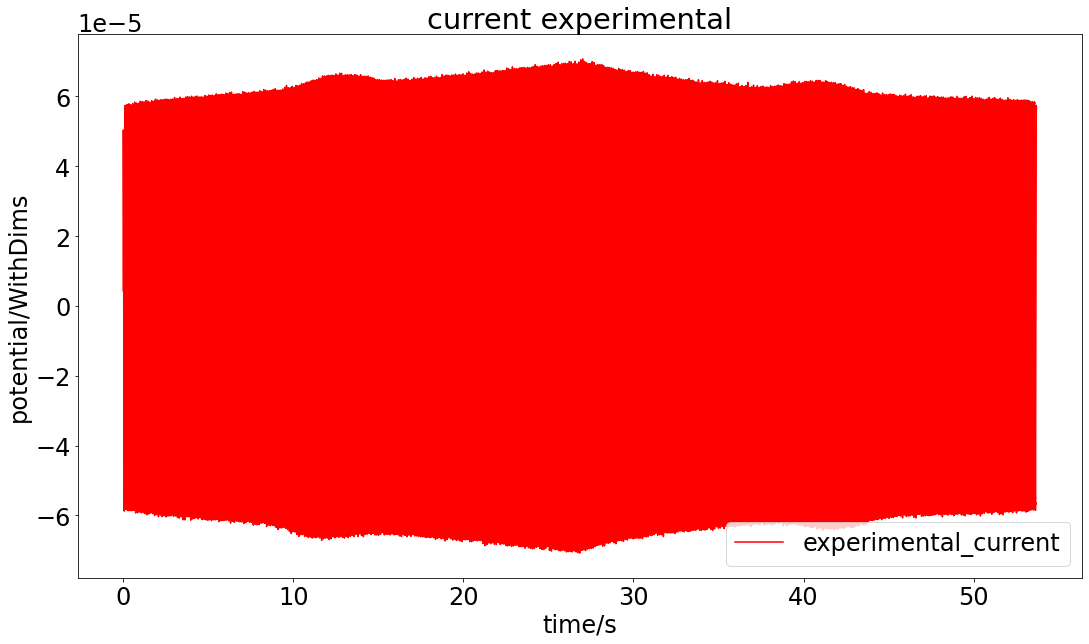

In [6]:
#checks and plot

exp_times = reduced_by_class.time
exp_times = np.asarray(exp_times)
exp_current = reduced_by_class.current
exp_current = np.asarray(exp_current)
measurements = reduced_by_class.shape[0]
print('meausrements in both directions: ', measurements)
measurements = int(measurements/2)
print('meausrements in single direction: ', measurements)

plt.figure(figsize=(18,10))
plt.title("current experimental")
plt.ylabel("potential/WithDims")
plt.xlabel("time/s")
plt.plot(exp_times, exp_current,'r', label='experimental_current')
plt.legend(loc='best')
#plt.yscale("log")
#plt.savefig('ac_current_pints.pdf')
plt.show()